In [123]:
import numpy as np
import matplotlib.pyplot as plt


In [124]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

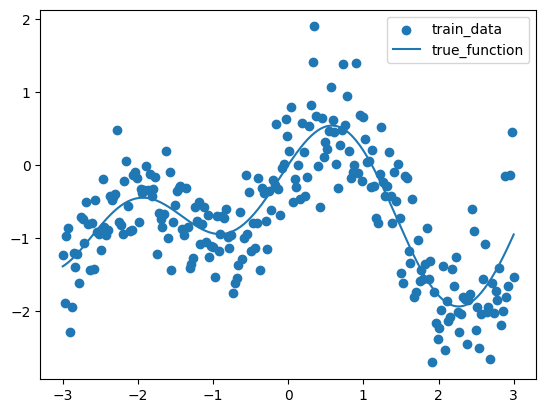

In [125]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [126]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [127]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [128]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

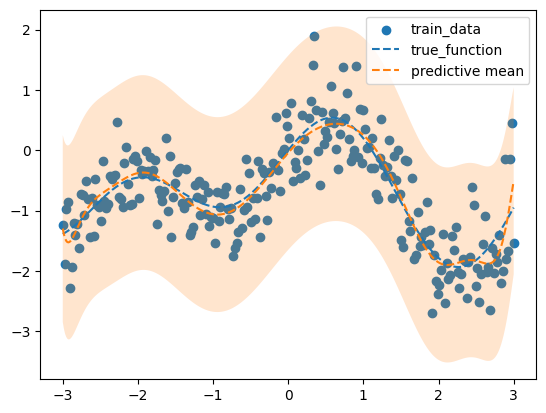

In [129]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

/tmp/ipython-input-1343182220.py:9: RuntimeWarning: invalid value encountered in log
  p = -0.5 * (N * np.log(2 * np.pi) + np.log(np.linalg.det(C)) + y.T @ np.linalg.inv(C) @ y)


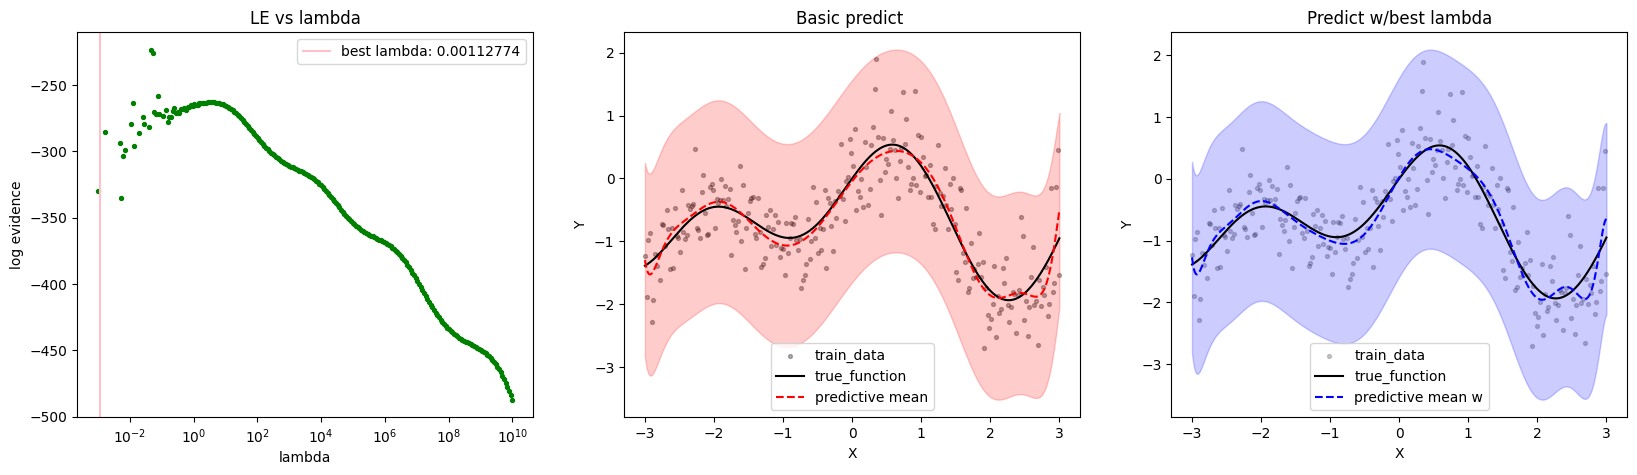

In [146]:
def log_evidence(lamb, X, y, alpha):
    '''
    Тут надо написать расчет log-evidence, через формулу, которая была в лекции
    Далее взять какой-то набор лямбд (например np.logspace(-6, 3, 160)) и оценить для каждой эту функцию
    Получится лучшая лябмда
    Вывести график log-evidence vs lambda + графики, чтобы визуально сравнить предсказания базовой модели и модели с лучшей лямбдой
    '''
    C = (1.0 / alpha) * np.eye(N) + (1.0 / (alpha * lamb)) * X @ X.T
    p = -0.5 * (N * np.log(2 * np.pi) + np.log(np.linalg.det(C)) + y.T @ np.linalg.inv(C) @ y)
    return p

arrayN = 250
lambda_set = np.logspace(-3, 10, arrayN)
log_evidence_results = np.zeros(arrayN)

for i in range(arrayN):
  log_evidence_results[i] = log_evidence(lambda_set[i], X, y, alpha)

best_lambda = lambda_set[np.argmax(log_evidence_results)]

plt.figure(figsize=(20, 5))

# Плот 1: log-evidence vs lambda

plt.subplot(1, 3, 1)
plt.title ("LE vs lambda")
plt.scatter(lambda_set, log_evidence_results, color='green', s = 8)
plt.axvline(x = best_lambda, color='pink', linestyle='-', label = f"best lambda: {best_lambda:.8f}")

plt.xlabel("lambda")
plt.ylabel("log evidence")

plt.xscale('log')
plt.legend()


# Плот 2: оригинал

plt.subplot(1, 3, 2)
plt.title ("Basic predict ")
plt.scatter(x, y, label='train_data', s = 8, alpha=0.3, color='black')
plt.plot(x_new, f_true(x_new), linestyle='-', label='true_function', color = 'black')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean', color = 'red')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2, color = 'red')

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()

# Плот 3: с лучшей лямбдой

plt.subplot(1, 3, 3)
plt.title ("Predict w/best lambda")
posterior_cov_new = np.linalg.inv(best_lambda * np.eye(M) + alpha * (X.T @ X))

bayes_mean_pred = X_new @ (alpha * posterior_cov_new @ (X.T @ y))
bayes_var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
bayes_std_pred = np.sqrt(bayes_var_pred)

plt.scatter(x, y, label='train_data', s = 8, alpha=0.2, color='black')
plt.plot(x_new, f_true(x_new), linestyle='-', label='true_function', color = 'black')
plt.plot(x_new, bayes_mean_pred, linestyle='--', label='predictive mean w', color = 'blue')

plt.fill_between(x_new, bayes_mean_pred - 2 * bayes_std_pred, bayes_mean_pred + 2 * bayes_std_pred, alpha=0.2, color = 'blue')

plt.xlabel("X")
plt.ylabel("Y")

plt.legend()

plt.show()